## Homework 6: Implement 10-fold cross-validation one time and 100 times

In [1]:
from collections import Counter
import numpy as np

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_idx = np.argsort(distances)[: self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_neighbor_labels = [self.y_train[i] for i in k_idx]
        # return the most common class label
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]

In [2]:
# We generate a synetic data for cross validation in the following

In [3]:
# Generate some data
N1 = 100; N2 = 20 # Class sizes
x_up = np.random.randn(N1,2)
x_low = np.random.randn(N2,2)+2
x = np.vstack((x_up, x_low))

t_up = np.zeros((N1,1), dtype=np.int64)
t_low = np.ones((N2,1), dtype=np.int64)
t = np.vstack((t_up, t_low)).squeeze(1)
tv=np.unique(t) # tv=[0,1]
print(t)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]


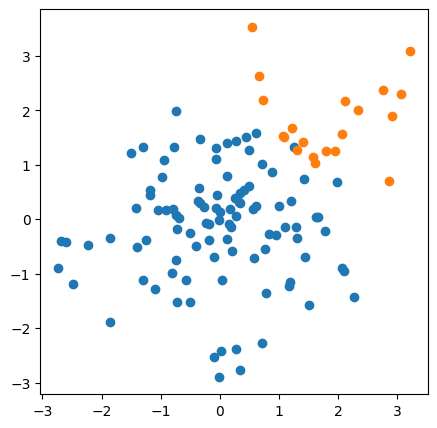

In [4]:
# Plot two-class data
import matplotlib.pyplot as plt
index=np.where(t==0)
point = x[index,:]
fig, ax = plt.subplots(figsize=(5, 5))
for k in tv:
    index=np.where(t==k)
    point = x[index,:].T
    ax.scatter(*point)

plt.show()

In [5]:
# 1. Repeat the 10-fold CV 100 times and average the curves of validation accuracy versus K to 
# determine the optimal K

In [6]:
# Implement your code here

def K_fold(X, y, k=3):
    rng = np.random.default_rng()
    n_samples = X.shape[0]
    idxs = np.arange(n_samples)
    rng.shuffle(idxs)
    
    folds = ([(X[np.delete(idxs, np.s_[_:_ + n_samples // k])], X[idxs[_:_ + n_samples // k]], y[np.delete(idxs, np.s_[_:_ + n_samples // k])], y[idxs[_:_ + n_samples // k]]) for _ in range(0, n_samples - (n_samples % k) * (n_samples // k + 1), n_samples // k)] + 
             [(X[np.delete(idxs, np.s_[_:_ + n_samples // k + 1])], X[idxs[_:_ + n_samples // k + 1]], y[np.delete(idxs, np.s_[_:_ + n_samples // k + 1])], y[idxs[_:_ + n_samples // k + 1]]) for _ in range(n_samples - (n_samples % k) * (n_samples // k + 1), n_samples, n_samples // k + 1)])
    return folds

Kvals = np.arange(3, 31, 2)

Errors = np.zeros((Kvals.shape[0], 100, 10))

for _, __ in enumerate(Kvals, start=0):
    for ___ in range(100):
        folds = K_fold(x, t, 10)
        for ____ in range(10):
            x_train, x_test, y_train, y_test = folds[____]
            clf = KNN(__)
            clf.fit(x_train, y_train)
            y_pred = clf.predict(x_test)
            Errors[_, ___, ____] = np.sum(y_pred != y_test) / x_test.shape[0]


Text(0, 0.5, 'Validation accuracy')

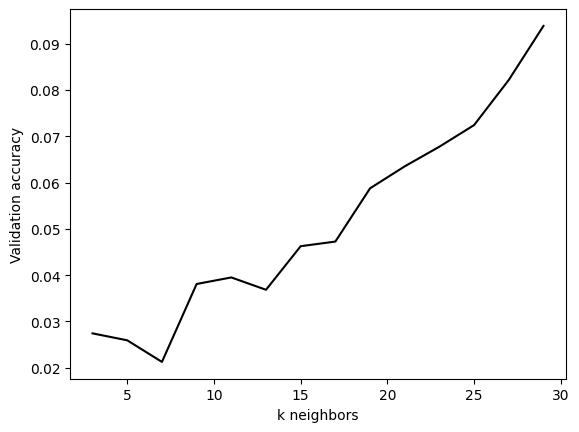

In [7]:
import pylab as plt
%matplotlib inline
plt.plot(Kvals,Errors.mean(axis=(1,2)),'k',label="Training loss")

plt.xlabel('k neighbors')
plt.ylabel('Validation accuracy')

In [8]:
# 2. Perform the 10-fold CV one time and average the curve of validation accuracy versus K

In [9]:
# Implement your code here
Errors = np.zeros((Kvals.shape[0], 10))

for _, __ in enumerate(Kvals, start=0):
    folds = K_fold(x, t, 10)
    for ____ in range(10):
        x_train, x_test, y_train, y_test = folds[____]
        clf = KNN(__)
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        Errors[_, ____] = np.sum(y_pred != y_test) / x_test.shape[0]

Text(0, 0.5, 'Validation accuracy')

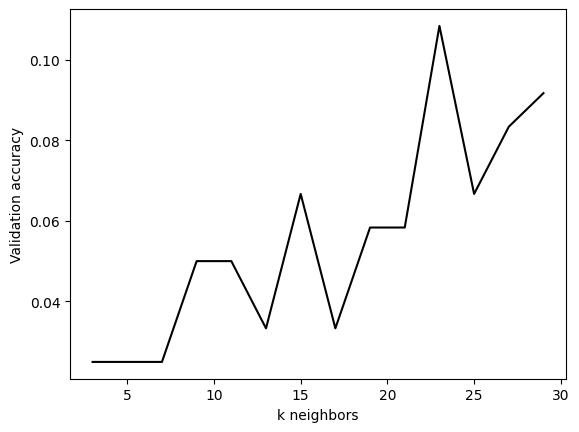

In [10]:
import pylab as plt
%matplotlib inline
plt.plot(Kvals,Errors.mean(axis=1),'k',label="Training loss")

plt.xlabel('k neighbors')
plt.ylabel('Validation accuracy')